In [4]:
#Exercise 1

import numpy as np
a = np.random.random((10, 3))
a[np.arange(10),np.absolute(a-0.5).argmin(axis=1)]

array([0.38311069, 0.78622801, 0.58740101, 0.54462054, 0.3562907 ,
       0.54980369, 0.45788609, 0.57752178, 0.73671021, 0.26067532])

In [5]:
#Exercise 2

a = np.random.random((6, 6))
np.array([np.sum(a[i])/np.min(a[np.arange(6),i]) for i in range(6)])

array([ 10.5458405 , 200.661447  ,  33.37654919,   9.26680966,
         6.98460231,  24.76436868])

In [19]:
#Exercise 3

x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
np.amax(np.array([x[i] for i in range(1,8) if x[i-1]==0]))

5

In [32]:
#Exercise 4

x = np.ones(10)
i = np.array([0, 1, 2, 3, 5, 5, 5, 8])

x=np.array([i==j for j in range (10)]).sum(axis=1)+x
print(x)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


In [19]:
#Exercise 5

n = 4
arr = np.arange(16).reshape(n, n)
d = {3-j: np.diagonal(arr[:, ::-1], j).tolist() for j in range(3, -4, -1) } 
print(d)

{0: [0], 1: [1, 4], 2: [2, 5, 8], 3: [3, 6, 9, 12], 4: [7, 10, 13], 5: [11, 14], 6: [15]}


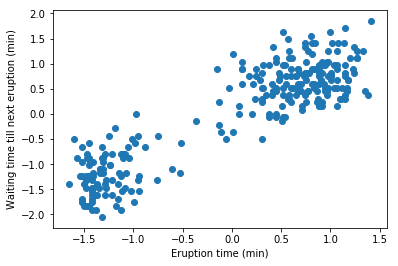

In [47]:
#Exercise 6

import matplotlib.pyplot as plt
data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]
data = (data - data.mean(axis=0)) / data.std(axis=0)

plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time till next eruption (min)')
plt.show()

centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))

In [48]:
def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    
    dist = dist = np.hstack([np.linalg.norm(pts - centroid, axis=1).reshape(-1, 1) for centroid in centroids])
    
    return np.argmin(dist, axis=1)

In [59]:
def norm(obs, centroids, labels):
    res = 0
    for i in range(centroids.shape[0]):
        res = res + abs(np.linalg.norm(obs[i==labels] - centroids[i], axis=1).sum())
    return res


def kmeans(obs, k, iter=20, thresh=1e-05):
    centroids = np.random.random((k, obs.shape[1]))
    labels = get_labels(obs, centroids)
    d = norm(obs, centroids, labels)
    mind = d
    centr = centroids
    for i in range(iter):
        d1 = d
        centroids = np.array([obs[labels == j].mean(axis=0) for j in range(k)])
        labels = get_labels(obs, centroids)
        d = norm(obs, centroids, labels) 
        if d < mind:
            mind = d
            centr = centroids
        if abs(d-d1) < thresh:
            break
    return centr



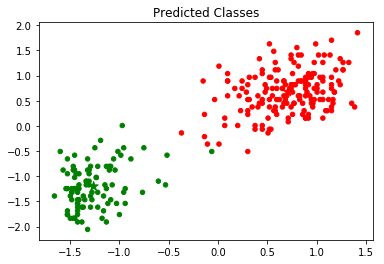

In [73]:
centroids = kmeans(data, 2)
labels = get_labels(data, centroids)

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()